In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fashion_train_df = pd.read_csv('/home/chanti/Documents/ML/ML - Practicals/FashionAnalysis/fashion-mnist_train.csv', sep = ',')

In [7]:
fashion_test_df = pd.read_csv('/home/chanti/Documents/ML/ML - Practicals/FashionAnalysis/fashion-mnist_test.csv', sep = ',')

# Visualization

In [8]:
fashion_test_df.shape

(10000, 785)

In [11]:
training = np.array(fashion_train_df, dtype = 'float32')

In [10]:
testing = np.array(fashion_test_df, dtype = 'float32')

3.0

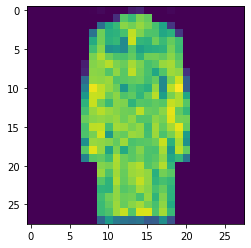

In [12]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

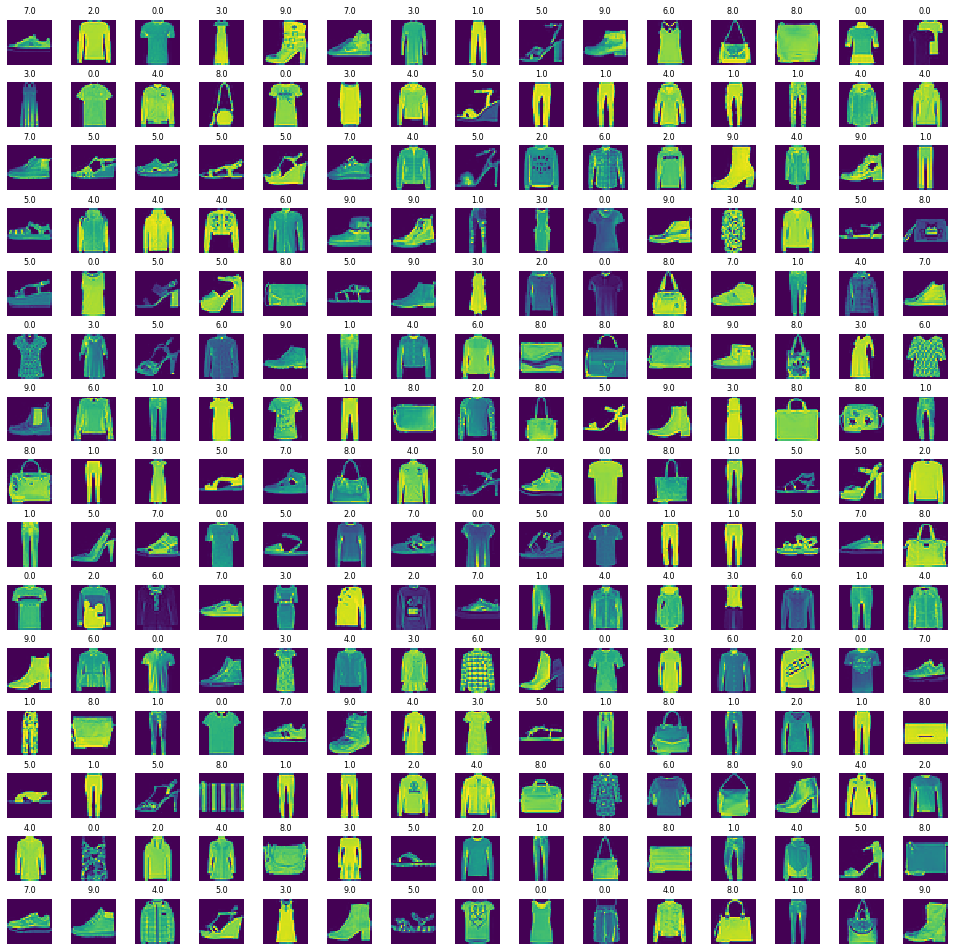

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

In [15]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [18]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [21]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [24]:
X_validate.shape

(12000, 28, 28, 1)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()

In [31]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

/home/chanti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [32]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [33]:
cnn_model.add(Flatten())

In [36]:
cnn_model.add(Dense(units = 32, activation = 'relu'))

In [37]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [39]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [40]:
epochs = 50

In [41]:
cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/chanti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 549us/step - loss: 1.1970 - accuracy: 0.5493 - val_loss: 0.6018 - val_accuracy: 0.7838
Epoch 2/50
48000/48000 [==============================] - 25s 514us/step - loss: 0.5192 - accuracy: 0.8173 - val_loss: 0.4565 - val_accuracy: 0.8410
Epoch 3/50
48000/48000 [==============================] - 25s 522us/step - loss: 0.4504 - accuracy: 0.8424 - val_loss: 0.4137 - val_accuracy: 0.8552
Epoch 4/50
48000/48000 [==============================] - 22s 461us/step - loss: 0.4034 - accuracy: 0.8586 - val_loss: 0.3937 - val_accuracy: 0.8587
Epoch 5/50
48000/48000 [==============================] - 23s 486us/step - loss: 0.3740 - accuracy: 0.8687 - val_loss: 0.3606 - val_accuracy: 0.8719
Epoch 6/50
48000/48000 [==============================] - 21s 433us/step - loss: 0.3532 - accuracy: 0.8761 - val_loss: 0.3434 - val_accuracy: 0.8799
Epoch 7/50
48000/48000 [==============================]

# Evaluating the model

In [42]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 4s 363us/step
Test Accuracy : 0.913


In [43]:
predicted_classes = cnn_model.predict_classes(X_test)

In [44]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

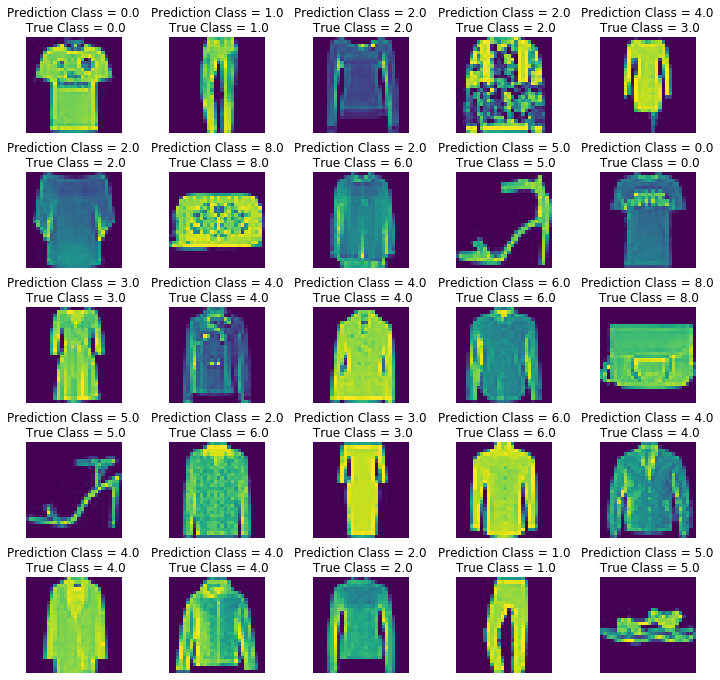

In [45]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

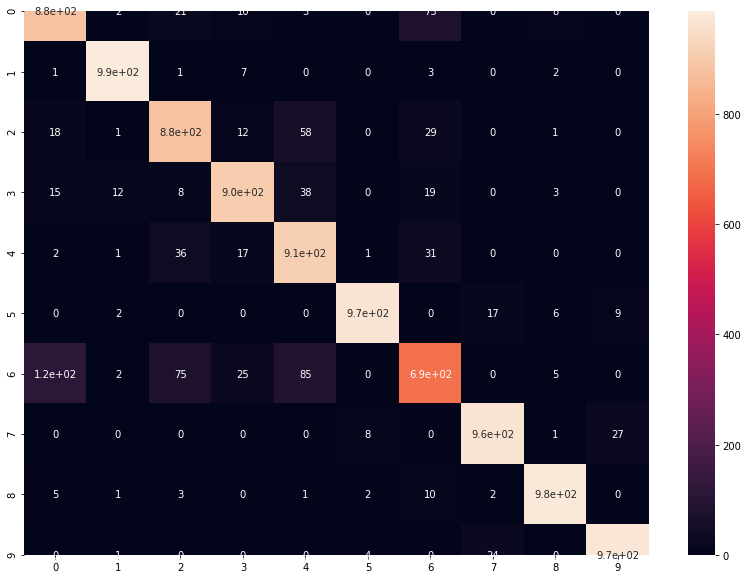

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [47]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.86      0.88      0.87      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.83      0.91      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.81      0.69      0.74      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

